이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 케라스와 텐서플로 소개

## 텐서플로란?

## 케라스란?

## 케라스와 텐서플로의 간략한 역사

## 딥러닝 작업 환경 설정하기
[Tensorflow, Pytorch 환경 구성 (Conda Env)](https://velog.io/@boom109/Conda-Env-Tensorflow-Pytorch-%ED%99%98%EA%B2%BD-%EA%B5%AC%EC%84%B1)
1. nvidia gpu와 적절한 버전의 드라이버 설치
2. CUDA, cudnn c언어의 라이브러리를 설치
3. tensorflow, pytorch 파이썬 라이브러리를 설치
4. colabs같은 클라우드 플랫폼

### 주피터 노트북: 권장하는 딥러닝 실험 도구
1. prototype 개발 - 개발 타겟을 결정
2. final.py 타겟을 개발
3. final.py을 이용한 보고용 어플리케이션을 notebook으로 개발

### 코랩 사용하기

#### 코랩 시작하기

#### pip로 패키지 설치하기

#### GPU 런타임 사용하기

## 텐서플로 시작하기

array vs. tensor
- array는 메모리 값을 가지고 있다.
- tensor 메모리에 값을 가질 수도 있고, 아닐 수도 있다.
- array는 중간 실행, tensor 일괄 실행
- 모든 array는 변경가능객체, tensor는 constant 텐서와 variable 텐서.


#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
import numpy as np
ax = np.ones(shape=(2,1))
print(ax)

[[1.]
 [1.]]


In [4]:
x.numpy()

array([[1.],
       [1.]], dtype=float32)

In [5]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [6]:
ax = np.zeros(shape=(2, 1))
print(ax)

[[0.]
 [0.]]


**랜덤 텐서**

In [7]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.31116563]
 [ 0.07767893]
 [-1.3308923 ]], shape=(3, 1), dtype=float32)


In [8]:
nx = np.random.normal(size=(3, 1))
print(nx)

[[-0.66856075]
 [ 0.67840441]
 [-1.22121055]]


In [9]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.5151154 ]
 [0.96051943]
 [0.32386303]], shape=(3, 1), dtype=float32)


**넘파이 배열에 값 할당하기**

In [10]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

**텐서플로 변수 만들기**

In [11]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5317706],
       [ 1.1485105],
       [ 0.8950206]], dtype=float32)>


**텐서플로 변수에 값 할당하기**

In [12]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [13]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
v[1, 0].assign(6.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [6.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기** : +=

In [15]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [7.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

In [16]:
tf.__version__

'2.12.0'

**기본적인 수학 연산**

In [17]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

#### GradientTape API 다시 살펴 보기

**`GradientTape` 사용하기**

tape 아래 수행된 연산은 모두 tape에 기록이 되어 자동으로 미분을 꺼내 쓸 수 있다.

In [18]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)

# dw = tape.gradient(loss, w)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**상수 입력 텐서와 함께 `GradientTape` 사용하기**
- 상수에 대한 변화율을 보기 위해서는 tape가 watch 주시하여 연산을 추적하게 해야 한다.

In [19]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    # 상수도 기억해
    tape.watch(input_const)
    result = tf.square(input_const)

gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기**

In [20]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        # 만유인력에 의한 낙하거리
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)

acceleration = outer_tape.gradient(speed, time)
speed, acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=19.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

#### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [22]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

[Quiz] 각각의 sample을 색을 달리해서 산점도를 그려보자.

In [23]:
import pandas as pd
tmp = pd.DataFrame(np.vstack([negative_samples, positive_samples]),
                   columns=['x1', 'x2'])
tmp['y'] = [0]*num_samples_per_class + [1]*num_samples_per_class
tmp.head()

,x1,x2,y
0,1.410155,4.484920,0
1,-0.087742,1.906410,0
2,1.040364,3.231543,0
3,0.385807,3.189310,0
4,-0.708504,1.275884,0


In [24]:
tmp.tail()

,x1,x2,y
1995,1.491868,0.967099,1
1996,0.642955,-0.395203,1
1997,2.688610,-0.312739,1
1998,4.977620,1.993943,1
1999,3.394358,-0.030021,1


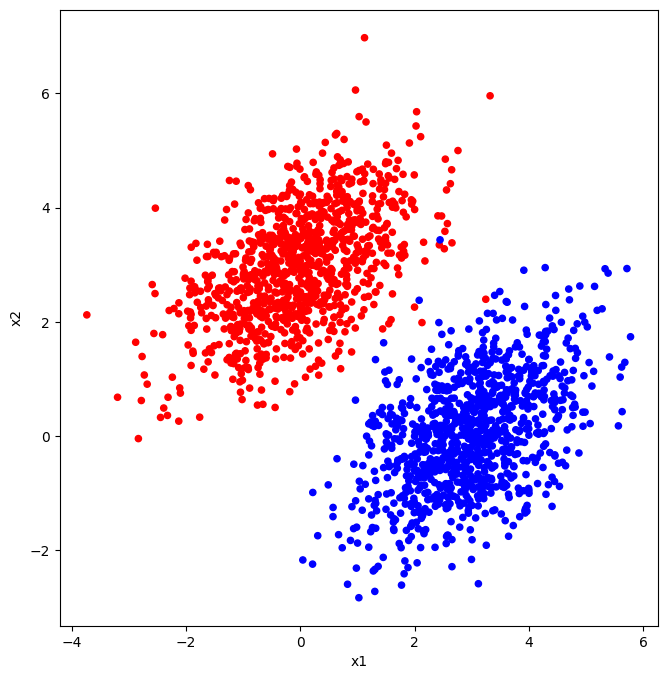

In [25]:
cols = tmp.y.map({0:'r', 1:'b'})
ax = tmp.plot.scatter('x1', 'x2', color=cols, figsize=(8,8))
ax.set_aspect('equal')

**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [29]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

**(0과 1로 구성된) 타깃 생성하기**

In [27]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets.shape

(2000, 1)

**두 클래스의 포인트를 그래프로 그리기**

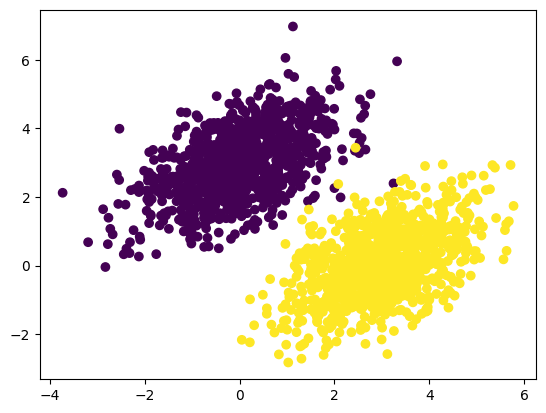

In [30]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**선형 분류기의 변수 만들기**

In [31]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**정방향 패스 함수**

In [32]:
# X => yhat : Feed Forward
def model(inputs):
    return tf.matmul(inputs, W) + b

**평균 제곱 오차 손실 함수**

회귀모델에 사용하는 MSE를 분류모델에 사용하고 있다. 좋지 않다.

In [33]:
# 머신러닝에서 모델의 성능을 측정하는 함수의 입력으로는 y, yhat의 순서로 입력해준다.
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 스텝 함수**

In [34]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # dw, db
    W.assign_sub(grad_loss_wrt_W * learning_rate)   # w -= lr * dw
    b.assign_add(- grad_loss_wrt_b * learning_rate) # b -= lr * db
    return loss

**배치 훈련 루프**

In [35]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 2.1125
1번째 스텝의 손실: 0.2843
2번째 스텝의 손실: 0.1346
3번째 스텝의 손실: 0.1090
4번째 스텝의 손실: 0.0997
5번째 스텝의 손실: 0.0930
6번째 스텝의 손실: 0.0871
7번째 스텝의 손실: 0.0817
8번째 스텝의 손실: 0.0768
9번째 스텝의 손실: 0.0723
10번째 스텝의 손실: 0.0682
11번째 스텝의 손실: 0.0645
12번째 스텝의 손실: 0.0611
13번째 스텝의 손실: 0.0580
14번째 스텝의 손실: 0.0551
15번째 스텝의 손실: 0.0525
16번째 스텝의 손실: 0.0502
17번째 스텝의 손실: 0.0480
18번째 스텝의 손실: 0.0460
19번째 스텝의 손실: 0.0442
20번째 스텝의 손실: 0.0426
21번째 스텝의 손실: 0.0411
22번째 스텝의 손실: 0.0397
23번째 스텝의 손실: 0.0385
24번째 스텝의 손실: 0.0373
25번째 스텝의 손실: 0.0363
26번째 스텝의 손실: 0.0353
27번째 스텝의 손실: 0.0345
28번째 스텝의 손실: 0.0337
29번째 스텝의 손실: 0.0330
30번째 스텝의 손실: 0.0323
31번째 스텝의 손실: 0.0317
32번째 스텝의 손실: 0.0311
33번째 스텝의 손실: 0.0306
34번째 스텝의 손실: 0.0302
35번째 스텝의 손실: 0.0297
36번째 스텝의 손실: 0.0294
37번째 스텝의 손실: 0.0290
38번째 스텝의 손실: 0.0287
39번째 스텝의 손실: 0.0284


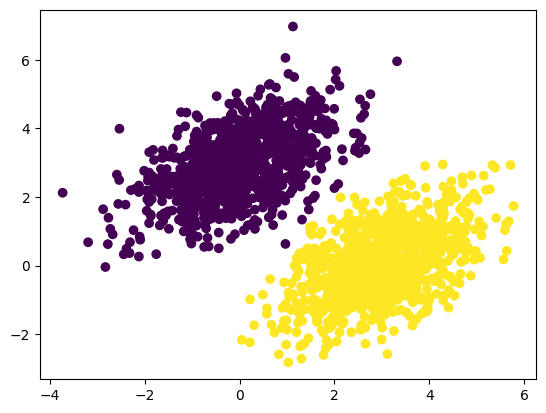

In [36]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

분류직선(hyperplane)을 그리기 위해 Prob(y=1) = 0.5가 되는 점들을 찾기 위해 아래 수식을 사용하였다.

$$ \begin{align}
\hat y = P(y=1) = X \cdot w + b \\
P(y=1) = x_1 * w_1 + x_2 * w_2 + b = 0.5 \\
0.5 = x_1 * w_1 + x_2 * w_2 + b \\
x_2 = - \cfrac {w_1}{w_2} * x_1 + \cfrac {0.5 - b}{w_2}
\end{align} $$

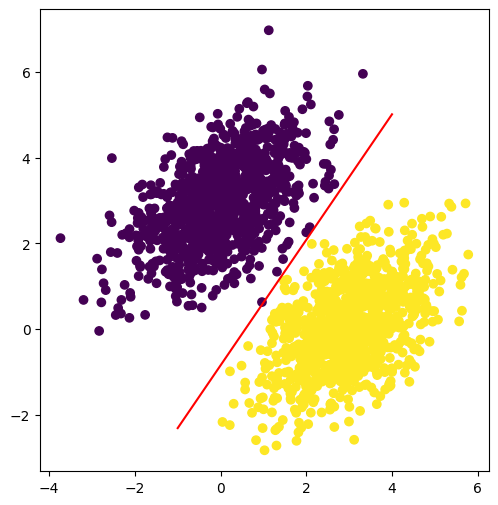

In [37]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.figure(figsize=(6, 6))
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.gca().set_aspect('equal')
plt.show()

정확도를 계산하면:

In [38]:
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[0.09979153],
       [0.14700034],
       [0.18702248],
       ...,
       [0.9169971 ],
       [1.0450239 ],
       [1.0089709 ]], dtype=float32)>

In [39]:
(np.where(predictions.numpy()>.5, 1, 0)  == targets).mean()

0.9965

In [40]:
predictions.numpy()

array([[0.09979153],
       [0.14700034],
       [0.18702248],
       ...,
       [0.9169971 ],
       [1.0450239 ],
       [1.0089709 ]], dtype=float32)

[퀴즈] 어떤 데이터가 틀렸는 지 확인해보고, 틀린 데이터를 위 산점도 그래프에서 표시해보세요.

In [41]:
np.where(np.where(predictions.numpy()>.5, 1, 0)  != targets)

(array([ 231,  672, 1110, 1169, 1391, 1564, 1910]),
 array([0, 0, 0, 0, 0, 0, 0]))

In [42]:
falseIdx = np.where(np.where(predictions.numpy()>.5, 1, 0)  != targets)[0]
falseIdx

array([ 231,  672, 1110, 1169, 1391, 1564, 1910])

In [43]:
inputs[falseIdx]

array([[3.2458296 , 2.3949237 ],
       [2.129626  , 1.9868155 ],
       [1.3164192 , 1.3391123 ],
       [2.4457362 , 3.434494  ],
       [1.4591712 , 1.6335151 ],
       [2.0804493 , 2.377286  ],
       [0.9661414 , 0.62993056]], dtype=float32)

In [44]:
targets[falseIdx]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

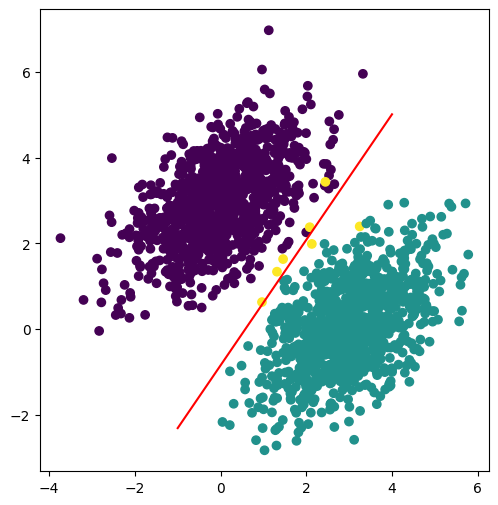

In [45]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.figure(figsize=(6, 6))
plt.plot(x, y, "-r")
cols = np.where(predictions[:, 0] > 0.5, 1, 0)
cols[falseIdx] = 2
plt.scatter(inputs[:, 0], inputs[:, 1], c=cols)
plt.gca().set_aspect('equal')
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

### 층: 딥러닝의 구성 요소

#### 케라스의 Layer 클래스

**`Layer`의 서브클래스로 구현한 `Dense` 층**
- 클래스의 call 메소드의 역할
- dense = SimpleDense(5) : SimpleDense 클래스의 인스턴스
- h = dense(X)  |  h = dense.call(X)

In [46]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    # input_shape = (batch_size, feature_size) = (b, p)
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        # y = F(X.w + b)
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

$$\begin{align}
y &= X \cdot w + b \\
(2, 32) &= (2, 784) \cdot (784, 32) + (32,)
\end{align}$$

In [ ]:
from tensorflow import keras

In [47]:
# my_dense = SimpleDense(units=32, activation=keras.layers.ReLU())
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [48]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu", input_dim=64),
    layers.Dense(32)
])

$$ \begin{align}
h_1 &= X \cdot w_1 + b_1 \\
(b, 32) &= (b, 64) \cdot (64, 32) + (32,) \\
\text{num of param}_1 & = 64 * 32 + 32 = 65 * 32 = 2080 \\
h_2 &= h_1 \cdot w_2 + b_2 \\
(b, 32) &= (b, 32) \cdot (32, 32) + (32,) \\
\text{num of param}_2 & = 32 * 32 + 32 = 33 * 32 = 1056
\end{align} $$

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________


input_dim을 모르면 summary 메소드를 호출할 수 없다.

In [51]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 층에서 모델로

### “컴파일” 단계: 학습 과정 설정

In [52]:
model = keras.Sequential([
    layers.Dense(4, activation="relu", input_dim=2),
    layers.Dense(1)
])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [53]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [54]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.metrics.mean_squared_error,
              metrics=[keras.metrics.binary_accuracy])

### 손실 함수 선택하기:
- 단변량 회귀문제(내일 온도): 최종 출력 1, 활성화 함수는 linear, None
- 다변량 회귀문제(내일 온도, 습도): 최종 출력 n, 활성화 함수는 linear, None
- 단변량 이항분류(주가 상승 여부): 최종 출력 1, 활성화 함수는 sigmoid
- 다변량 이항분류(주가와 환율 상승 여부): 최종 출력 n, 활성화 함수는 sigmoid
- 단변량 다항분류(분꽃 분류): 최종 출력 m(범주의 수), 활성화 함수는 softmax
- 다변량 다항분류(한 이미지에 개/고양이의 존재 유무): 최종 출력 n, 활성화 함수는 sigmoid

```python
# 배타적인 여러 범주에 대한 스코어를 확률로 변환시키는 함수
def softmax(s):
    exp(s) / exp(s).sum()
```

### fit() 메서드 이해하기

**넘파이 데이터로 `fit()` 메서드 호출하기**

In [55]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 2s 3ms/step - loss: 6.4823 - binary_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 5.6301 - binary_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 4.9735 - binary_accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 4.3850 - binary_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 3.8321 - binary_accuracy: 0.5000


In [56]:
inputs.shape

(2000, 2)

In [57]:
history.history

{'loss': [6.48232364654541,
  5.6301398277282715,
  4.973540306091309,
  4.384951114654541,
  3.8321352005004883],
 'binary_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기

**`validation_data` 매개변수 사용하기**

In [58]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
hist = model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.1179 - binary_accuracy: 0.9400 - val_loss: 0.1040 - val_binary_accuracy: 0.9767
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0732 - binary_accuracy: 0.9550 - val_loss: 0.0232 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0737 - binary_accuracy: 0.9536 - val_loss: 0.0253 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0733 - binary_accuracy: 0.9607 - val_loss: 0.2234 - val_binary_accuracy: 0.7133
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0727 - binary_accuracy: 0.9614 - val_loss: 0.1071 - val_binary_accuracy: 0.9683


<Axes: >

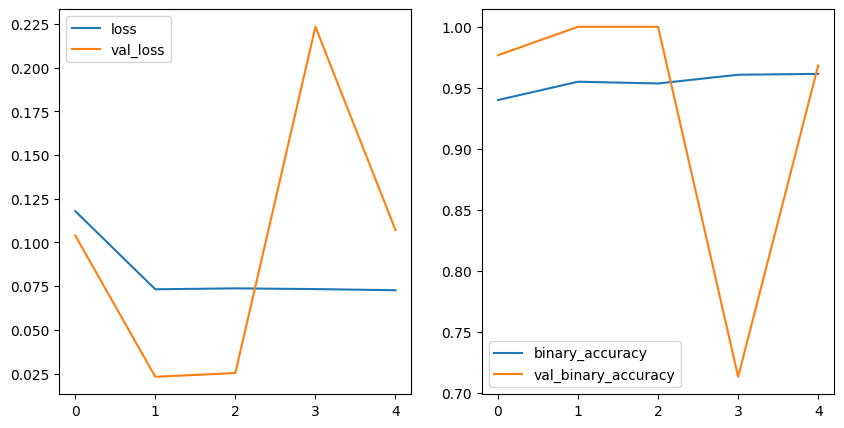

In [59]:
tmp = pd.DataFrame(hist.history)
fig, axes = plt.subplots(1,2, figsize=(10, 5))
tmp[['loss', 'val_loss']].plot(ax=axes[0])
tmp[['binary_accuracy', 'val_binary_accuracy']].plot(ax=axes[1])

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.1013 - binary_accuracy: 0.9443 - val_loss: 0.0472 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0707 - binary_accuracy: 0.9600 - val_loss: 0.0751 - val_binary_accuracy: 0.9733
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0727 - binary_accuracy: 0.9614 - val_loss: 0.0571 - val_binary_accuracy: 0.9933
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0752 - binary_accuracy: 0.9457 - val_loss: 0.0307 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0699 - binary_accuracy: 0.9514 - val_loss: 0.3770 - val_binary_accuracy: 0.6900


<Axes: >

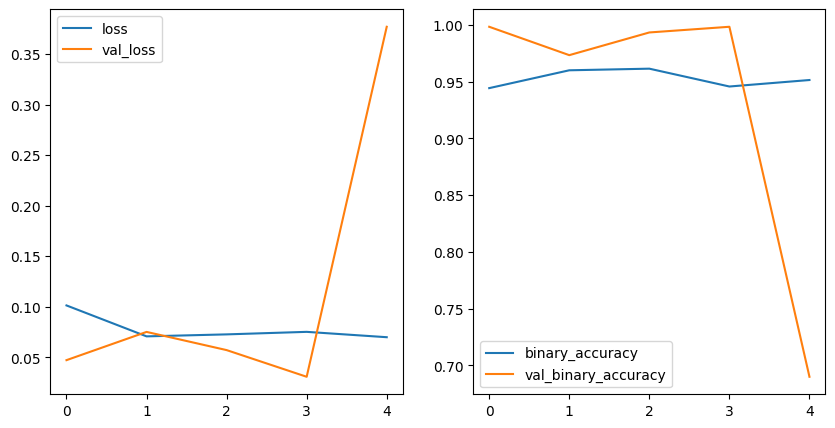

In [ ]:
m = keras.Sequential([keras.layers.Dense(1)])
m.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
          loss=keras.losses.MeanSquaredError(),
          metrics=[keras.metrics.BinaryAccuracy()])

shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

hist = m.fit(
    shuffled_inputs,
    shuffled_targets,
    epochs=5,
    batch_size=16,
    validation_split=.3
)

tmp = pd.DataFrame(hist.history)
fig, axes = plt.subplots(1,2, figsize=(10, 5))
tmp[['loss', 'val_loss']].plot(ax=axes[0])
tmp[['binary_accuracy', 'val_binary_accuracy']].plot(ax=axes[1])

### 추론: 훈련한 모델 사용하기

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[0.08807909]
 [0.44321942]
 [0.2865188 ]
 [0.13737223]
 [1.4073268 ]
 [1.5426879 ]
 [1.2747419 ]
 [1.6667745 ]
 [0.26283327]
 [0.24232507]]


## 요약
1. keras.models.Sequential() 빈 모델(그래프, 네트워크)을 만든다.
2. Sequention 안엔 리스트 형식으로 layer를 쌓는다.
 - 또는 모델의 add 메소드로 layer를 하나씩 추가한다.
3. fit 전에 수행. compile 메소드로 컴파일을 해주는데
 - optimizer 지정: w 업데이트 방법
 - loss 지정: 손실함수
 - metrics : 모델이 얼마나 좋은 지 측정하는 적도
4. m.fit(X_train, y_train, batch_size, epochs) 메소드로 학습을 수행
5. 평가를 할 때는 m.evaluate(X_test, y_test)
6. 예측을 할 때는 m.predict(X_test)

In [ ]:
m = models.Sequential([
    layers.Dense(4, activation="relu", input_dim=2),
    layers.Dense(1)
])

In [ ]:
m = models.Sequential()
m.add(layers.Dense(4, activation="relu", input_dim=2))
m.add(layers.Dense(1))